In [ ]:
import numpy as np
import pandas as pd
import math
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
os.chdir("C:/Users/Sagar Ghiya/Desktop")

In [21]:
#Importing data
df = pd.read_csv('hour.csv')

In [22]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Dropping columns not needed for fitting model.

In [23]:
df1 = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [24]:
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Checking for missing values. No missing values in the dataset

In [25]:
df1.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [26]:
df1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [27]:
df1.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Text(0.5,1,'Date vs Count')

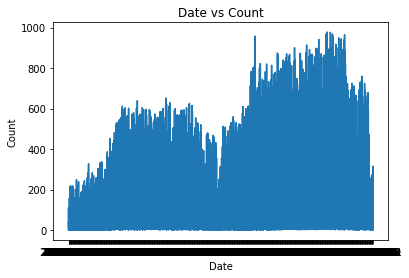

In [28]:
#Plotting date vs count
plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date vs Count')

Text(0.5,1,'Count vs Hour')

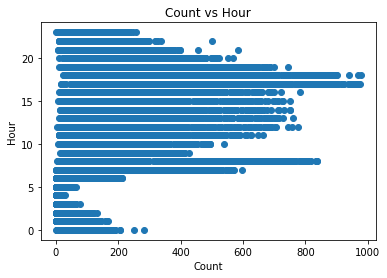

In [29]:
#Count vs Hour
plt.scatter(df1['cnt'],df1['hr'])
plt.xlabel('Count')
plt.ylabel('Hour')
plt.title('Count vs Hour')

(array([ 16879.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    500.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

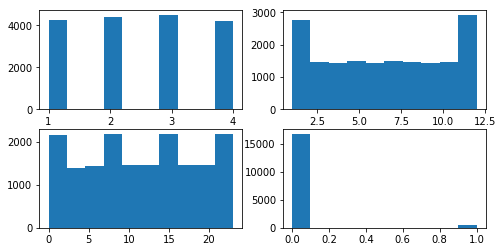

In [30]:
#Checking distribution of key features with histogram
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                   figsize=(8,4))

ax1.hist(df1['season'])
ax2.hist(df1['mnth'])
ax3.hist(df1['hr'])
ax4.hist(df1['holiday'])

In [31]:
df1.shape

(17379, 13)

In [32]:
#Dividing into train and test
df2 = df1.drop(['cnt'], axis = 1)
y = df1['cnt']
x_trn, x_tst, y_trn, y_tst = train_test_split(df2,y, test_size = 0.3)


# Hyperparameter Tuning
Tweaking number of trees and maximum features to be used to get best possible accuracy.

In [ ]:
param_grid = {'max_features': [6,8,10,12] , 'n_estimators': [10,30,50,100,500,1000,2500,5000] }

In [34]:
rf = RandomForestRegressor()

In [35]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)

In [36]:
grid_search.fit(x_trn, y_trn)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [6, 8, 10, 12], 'n_estimators': [10, 30, 50, 100, 500, 1000, 2500, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
#Best Combination. n_estimators give almost same error when increased from 1000 to 5000. So no point in increasing it futher.
grid_search.best_params_

{'max_features': 10, 'n_estimators': 5000}

In [38]:
final_model_rf = grid_search.best_estimator_
final_model_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [39]:
#Function to evaluate model with Root Mean Squared Error
def evaluate(model, features, labels):
    predictions = model.predict(features)
    mse = mean_squared_error(labels,predictions)
    return np.sqrt(mse)
    

In [40]:
train_error = evaluate(final_model_rf, x_trn, y_trn)
print("Train error is : " , train_error)

Train error is :  15.0773286338


In [41]:
test_error = evaluate(final_model_rf, x_tst, y_tst)
print("Test error is : ", test_error)

Test error is :  43.4027786128


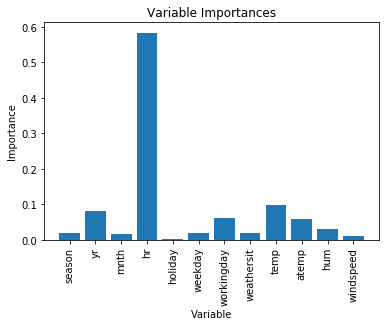

In [42]:
# Variable importance

importances = list(final_model_rf.feature_importances_)
feature_list = list(x_trn.columns.values)

feature_importances = [(feature, float(round(importance, 3))) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importances');
